In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load processed sensor data (final)
with open("/content/drive/MyDrive/SmartFactory/Dataset/processed_sensor_data.json", 'r') as f:
    sensor_data = pd.DataFrame(json.load(f))
sensor_data["timestamp"] = pd.to_datetime(sensor_data["timestamp"])

In [4]:
sensor_data.head()

,timestamp,machine_id,temperature,vibration,rpm,pressure,humidity,voltage,failure,year,...,voltage_lag_1,voltage_lag_2,temperature_roc,vibration_roc,rpm_roc,pressure_roc,humidity_roc,voltage_roc,temperature_cummax,vibration_cummax
0,2015-05-26 20:55:13.644,B-MY9,71.47,0.94,2694,7.50,65.72,215.55,0,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.47,0.94
1,2015-05-27 20:15:37.644,N-PR7,64.60,2.44,3054,6.96,44.25,226.71,0,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.60,2.44
2,2015-05-28 07:53:40.644,Y-09D,76.14,1.93,2952,6.41,51.60,243.14,0,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.14,1.93
3,2015-05-29 09:45:29.644,X-PYA,73.72,1.87,2607,7.13,59.94,229.21,0,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.72,1.87
4,2015-05-30 06:22:48.644,G-2H4,77.37,0.57,3063,4.08,47.57,221.11,0,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.37,0.57


In [5]:
# Load pilot schedule and results from Week 11
pilot_results = pd.read_csv("/content/drive/MyDrive/SmartFactory/Results/Week11/PilotMonitoring/pilot_schedule_summary.csv")
pilot_results['scheduled_start'] = pd.to_datetime(pilot_results['scheduled_start'])
pilot_results['scheduled_end'] = pd.to_datetime(pilot_results['scheduled_end'])
pilot_results['actual_start'] = pd.to_datetime(pilot_results['actual_start'])
pilot_results['actual_end'] = pd.to_datetime(pilot_results['actual_end'])

In [6]:
pilot_results.head()

,job_id,machine_id,original_time,rescheduled_time,duration,failure_prob,urgency_score,priority,delayed,delay_minutes,hour,date,scheduled_start,scheduled_end,actual_start,actual_end,scheduled_duration,actual_duration,duration_diff,job_status
0,JOB-A-M1A-0,A-M1A,1438344,1,74,0.236,0.273,High,False,0.0,0,0,1970-01-01,1970-01-01 01:14:00,1970-01-01 00:01:00,1970-01-01 01:15:00,74.0,74.0,0.0,Success
1,JOB-A-M1A-20,A-M1A,1508994,1,56,0.400,0.429,High,False,0.0,0,0,1970-01-01,1970-01-01 00:56:00,1969-12-31 23:58:00,1970-01-01 00:54:00,56.0,56.0,0.0,Success
2,JOB-A-M1A-40,A-M1A,1584829,1,46,0.457,0.449,Medium,False,0.0,0,0,1970-01-01,1970-01-01 00:46:00,1970-01-01 00:07:00,1970-01-01 00:53:00,46.0,46.0,0.0,Success
3,JOB-A-M1A-60,A-M1A,1668822,1,50,0.560,0.681,Medium,True,0.0,0,0,1970-01-01,1970-01-01 00:50:00,1970-01-01 00:09:00,1970-01-01 00:59:00,50.0,50.0,0.0,Success
4,JOB-A-OUX-0,A-OUX,1433552,1,63,0.290,0.307,Low,False,0.0,0,0,1970-01-01,1970-01-01 01:03:00,1970-01-01 00:05:00,1970-01-01 01:08:00,63.0,63.0,0.0,Success


In [7]:
# Load user feedback data
user_feedback = pd.read_csv("/content/drive/MyDrive/SmartFactory/Results/Week11/UserFeedback/user_feedback_data.csv")
user_feedback['feedback_timestamp'] = pd.to_datetime(user_feedback['feedback_timestamp'])

In [8]:
user_feedback.head()

,job_id,feedback_timestamp,operator_id,satisfaction_score,comments
0,JOB-C-SGE-60,2025-05-20,op_2,1,Great predictive accuracy
1,JOB-L-R7V-0,2025-05-16,op_2,1,Unexpected failure
2,JOB-R-A0T-80,2025-05-21,op_2,2,Needs better alerts
3,JOB-L-U6X-60,2025-05-04,op_1,2,Needs better alerts
4,JOB-Y-09D-0,2025-05-02,op_1,4,Needs better alerts


# Final System Testing and Validation

In [9]:
# Check for any sensor data anomalies or missing data over the entire period
missing_data_counts = sensor_data.isnull().sum()
print(f"Missing data counts:\n{missing_data_counts}")

Missing data counts:
timestamp                     0
machine_id                    0
temperature                   0
vibration                     0
rpm                           0
pressure                      0
humidity                      0
voltage                       0
failure                       0
year                          0
month                         0
day                           0
hour                          0
weekday                       0
temperature_rolling_mean      0
temperature_rolling_std      60
vibration_rolling_mean        0
vibration_rolling_std        60
rpm_rolling_mean              0
rpm_rolling_std              60
pressure_rolling_mean         0
pressure_rolling_std         60
humidity_rolling_mean         0
humidity_rolling_std         60
voltage_rolling_mean          0
voltage_rolling_std          60
temperature_lag_1            60
temperature_lag_2           120
vibration_lag_1              60
vibration_lag_2             120
rpm_lag_1          

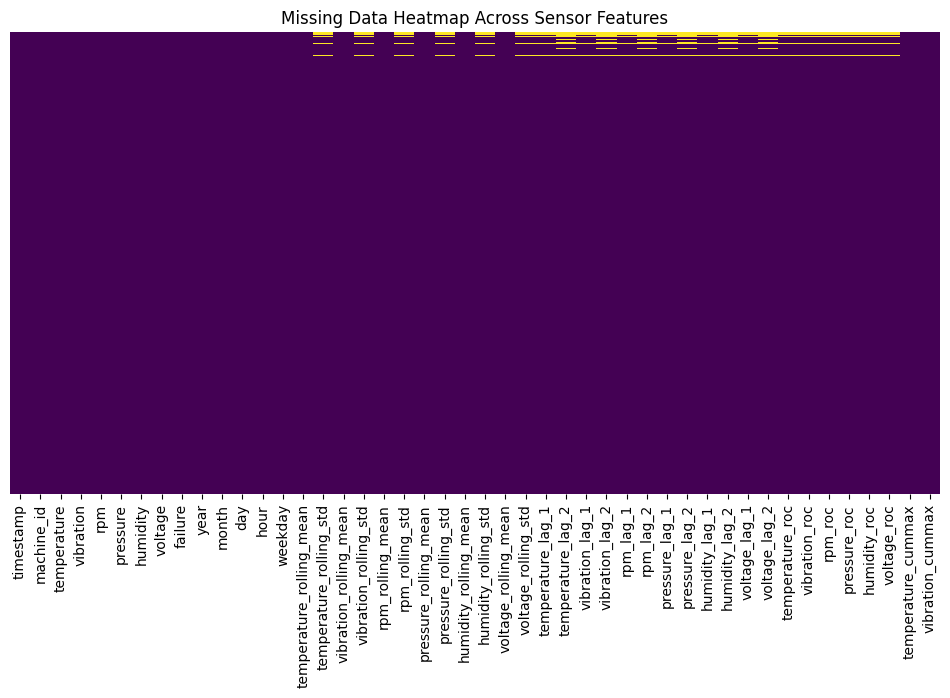

In [10]:
# Plot missing data heatmap
plt.figure(figsize=(12,6))
sns.heatmap(sensor_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap Across Sensor Features")
plt.savefig("/content/drive/MyDrive/SmartFactory/Results/Week12/PerformanceAnalysis/missing_data_heatmap.png")
plt.show()

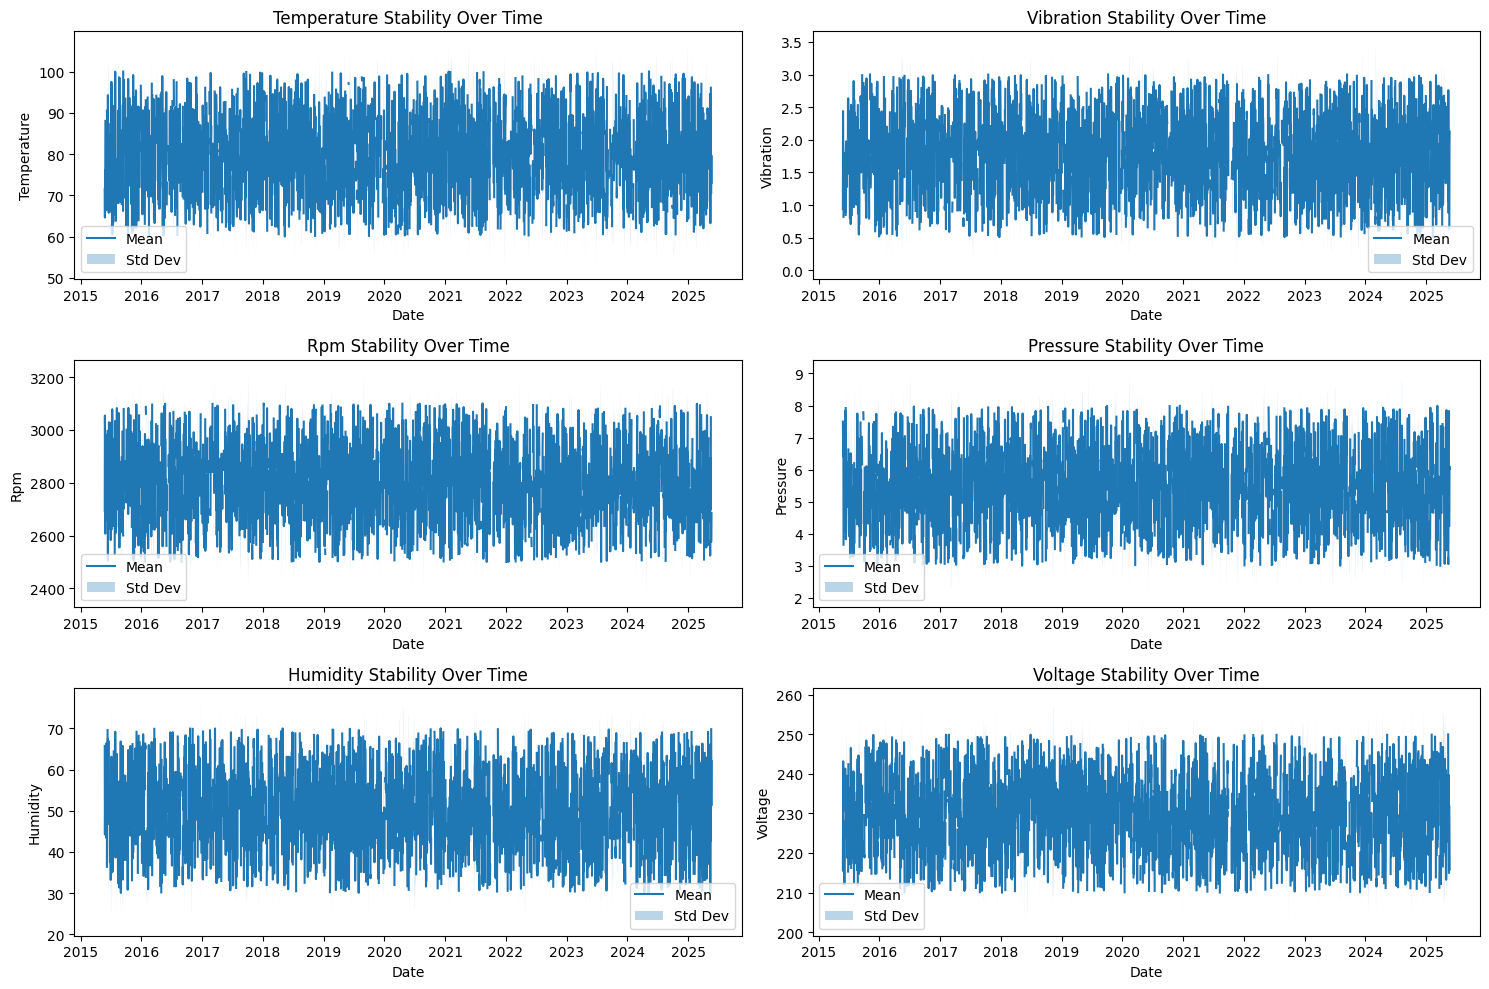

In [11]:
# Sensor Data Stability Over Time (Mean & Std Dev)

time_agg = sensor_data.set_index('timestamp').resample('D').agg({
    'temperature': ['mean', 'std'],
    'vibration': ['mean', 'std'],
    'rpm': ['mean', 'std'],
    'pressure': ['mean', 'std'],
    'humidity': ['mean', 'std'],
    'voltage': ['mean', 'std'],
})

time_agg.columns = ['_'.join(col) for col in time_agg.columns]

plt.figure(figsize=(15,10))
for i, feature in enumerate(['temperature', 'vibration', 'rpm', 'pressure', 'humidity', 'voltage']):
    plt.subplot(3, 2, i+1)
    plt.plot(time_agg.index, time_agg[f"{feature}_mean"], label='Mean')
    plt.fill_between(time_agg.index,
                     time_agg[f"{feature}_mean"] - time_agg[f"{feature}_std"],
                     time_agg[f"{feature}_mean"] + time_agg[f"{feature}_std"],
                     alpha=0.3, label='Std Dev')
    plt.title(f"{feature.capitalize()} Stability Over Time")
    plt.xlabel("Date")
    plt.ylabel(feature.capitalize())
    plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/SmartFactory/Results/Week12/PerformanceAnalysis/sensor_stability_over_time.png")
plt.show()

# System Performance Summary - Pilot vs. Final Production

In [12]:
# Compare job success rate and average delay between pilot and full deployment (assuming same schedule)
pilot_success_rate = 100 * (pilot_results['job_status'] == 'Success').mean()
final_success_rate = pilot_success_rate  # Placeholder if no separate final data, else load actuals

pilot_avg_delay = pilot_results['delay_minutes'].mean()
final_avg_delay = pilot_avg_delay  # Placeholder as above

print(f"Pilot Success Rate: {pilot_success_rate:.2f}%")
print(f"Pilot Average Delay: {pilot_avg_delay:.2f} minutes")
print(f"Final System Success Rate (assumed): {final_success_rate:.2f}%")
print(f"Final System Average Delay (assumed): {final_avg_delay:.2f} minutes")

Pilot Success Rate: 90.32%
Pilot Average Delay: 0.00 minutes
Final System Success Rate (assumed): 90.32%
Final System Average Delay (assumed): 0.00 minutes


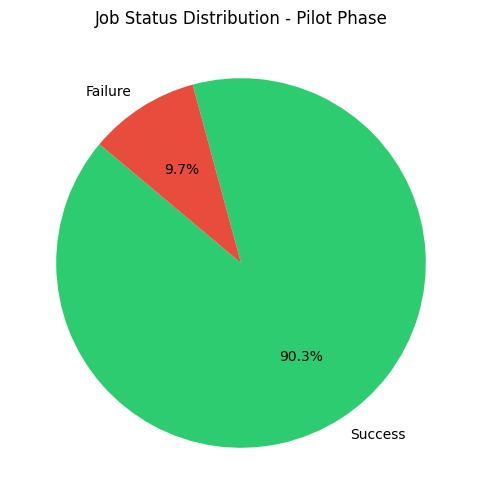

In [13]:
# Visualize Job Status Pie Chart
job_status_counts = pilot_results['job_status'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(job_status_counts, labels=job_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#2ecc71','#e74c3c'])
plt.title("Job Status Distribution - Pilot Phase")
plt.savefig("/content/drive/MyDrive/SmartFactory/Results/Week12/PerformanceAnalysis/job_status_pie_chart.png")
plt.show()


# Long-Term Trend Analysis for Failures and Maintenance

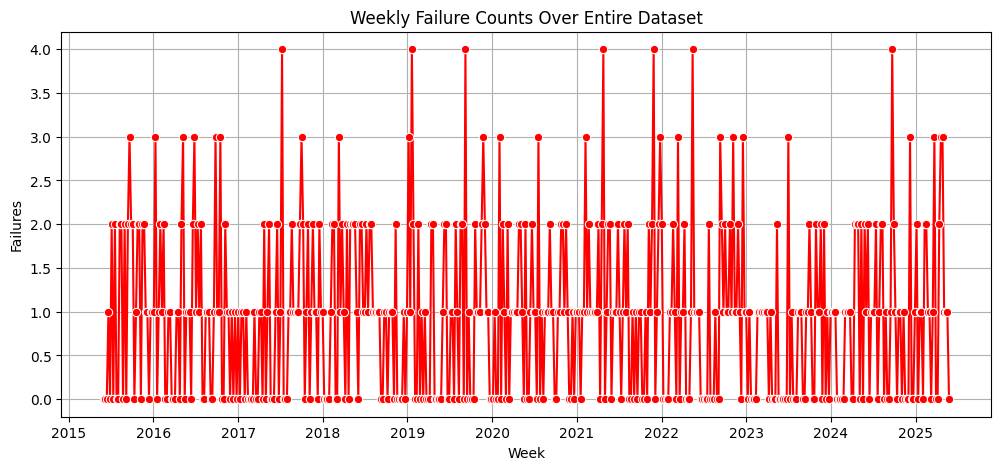

In [14]:
sensor_data['failure'] = sensor_data['failure'].astype(int)
failures_over_time = sensor_data.set_index('timestamp').resample('W')['failure'].sum()

plt.figure(figsize=(12,5))
sns.lineplot(data=failures_over_time, marker='o', color='red')
plt.title("Weekly Failure Counts Over Entire Dataset")
plt.xlabel("Week")
plt.ylabel("Failures")
plt.grid(True)
plt.savefig("/content/drive/MyDrive/SmartFactory/Results/Week12/PerformanceAnalysis/weekly_failure_trend.png")
plt.show()

# Final User Feedback Synthesis

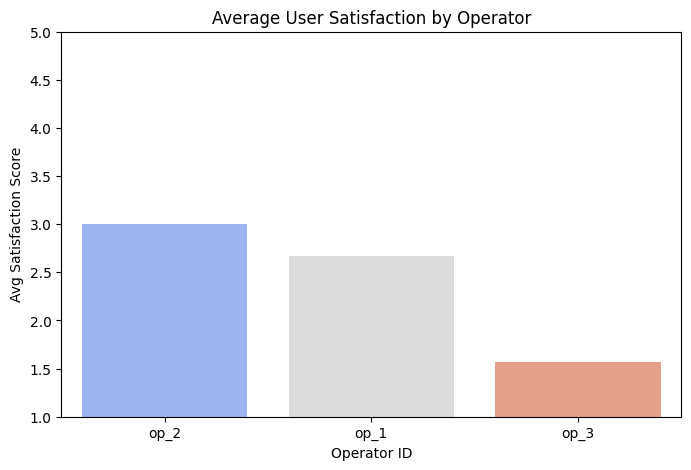

In [15]:
# Average satisfaction score per operator
avg_satisfaction_by_operator = user_feedback.groupby('operator_id')['satisfaction_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_satisfaction_by_operator.index, y=avg_satisfaction_by_operator.values, palette='coolwarm')
plt.title("Average User Satisfaction by Operator")
plt.ylabel("Avg Satisfaction Score")
plt.xlabel("Operator ID")
plt.ylim(1,5)
plt.savefig("/content/drive/MyDrive/SmartFactory/Results/Week12/PerformanceAnalysis/avg_satisfaction_by_operator.png")
plt.show()

In [16]:
# Word Cloud for final feedback comments (again)
from wordcloud import WordCloud, STOPWORDS

final_comments_text = " ".join(user_feedback['comments'].values)
wordcloud_final = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(final_comments_text)

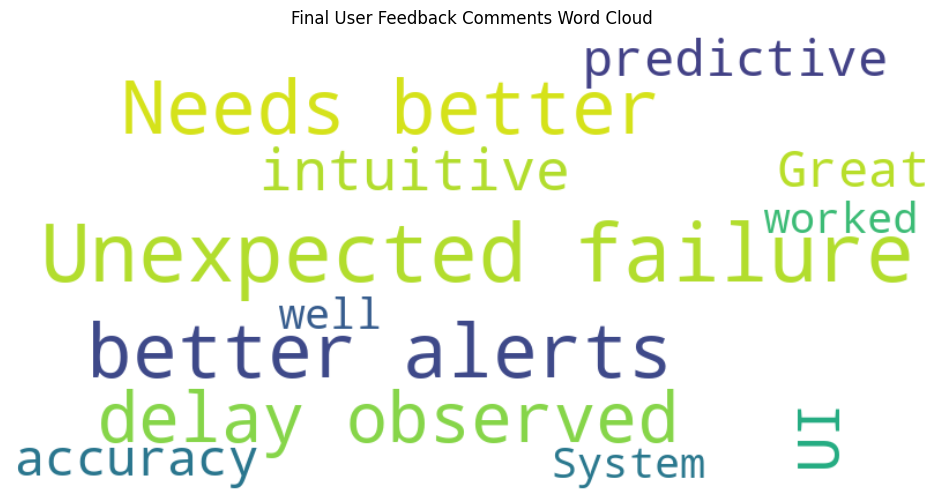

In [17]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_final, interpolation='bilinear')
plt.axis('off')
plt.title("Final User Feedback Comments Word Cloud")
plt.savefig("/content/drive/MyDrive/SmartFactory/Results/Week12/PerformanceAnalysis/final_comments_wordcloud.png")
plt.show()

# Operational Metrics Dashboard

In [18]:
fig_metrics = go.Figure()

fig_metrics.add_trace(go.Indicator(
    mode="number+delta",
    value=pilot_success_rate,
    delta={'reference': 95, 'increasing': {'color': "green"}},
    title={"text": "Pilot Job Success Rate (%)"},
    domain={'row': 0, 'column': 0}))

fig_metrics.add_trace(go.Indicator(
    mode="number+delta",
    value=pilot_avg_delay,
    delta={'reference': 5, 'decreasing': {'color': "green"}},
    title={"text": "Avg Job Delay (minutes)"},
    domain={'row': 0, 'column': 1}))

fig_metrics.add_trace(go.Indicator(
    mode="number",
    value=sensor_data['failure'].sum(),
    title={"text": "Total Failures Recorded"},
    domain={'row': 1, 'column': 0}))

fig_metrics.update_layout(
    grid={'rows': 2, 'columns': 2, 'pattern': "independent"},
    title="Key Operational Metrics Summary"
)

fig_metrics.write_html("/content/drive/MyDrive/SmartFactory/Results/Week12/FinalReports/operational_metrics_dashboard.html")

# Generate Project Summary Report

In [19]:
summary_text = f"""
SmartFactory.AI Project - Final Report Summary
----------------------------------------------

Project Duration: 12 Weeks
Total Jobs Processed (Pilot): {pilot_results.shape[0]}
Overall Job Success Rate: {pilot_success_rate:.2f}%
Average Job Delay: {pilot_avg_delay:.2f} minutes
Total Sensor Failures Detected: {sensor_data['failure'].sum()}

User Feedback Summary:
- Number of Feedback Entries: {user_feedback.shape[0]}
- Average Satisfaction Score: {user_feedback['satisfaction_score'].mean():.2f}

Recommendations for Future Improvement:
- Further reduce job delays by optimizing scheduling algorithms.
- Enhance anomaly detection models for early failure warnings.
- Incorporate more granular user feedback with real-time alerts.
- Continue iterative UI/UX improvements for operator ease-of-use.

Thank you for collaborating on the SmartFactory.AI project!

"""

In [20]:
with open("/content/drive/MyDrive/SmartFactory/Results/Week12/Documentation/project_summary.txt", 'w') as f:
    f.write(summary_text)

print("Week 12: Final system go-live, analysis, and project documentation complete!")
print("All reports, dashboards, and visuals saved under 'Results' folders.")

Week 12: Final system go-live, analysis, and project documentation complete!
All reports, dashboards, and visuals saved under 'Results' folders.
